<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/LAB2_2_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Hameon4/Exfiltration-dataset/main/exfil_monogram.csv

In [ ]:
!pip install ctgan
!pip install table_evaluator

In [29]:
import pandas as pd 
data = pd.read_csv('/content/exfil_monogram.csv')

In [ ]:
!pip install sdv

In [ ]:
# Train the model
from sdv.tabular import CTGAN
model = CTGAN()
model.fit(data)

In [31]:
# Get the sample / generating synthetic data from the model
synthetic_data = model.sample(num_rows=200)

In [32]:
# Merge fake table with original data
malware_data = data.append(synthetic_data)

In [33]:
# Clarify row numbers
print(data.shape)
print(synthetic_data.shape)
print(malware_data.shape)

(6141, 121)
(200, 121)
(6341, 121)


### **PART 2 & 3: Retrain the Tensorflow model & Evaluate the model**

In [38]:
# Shuffle the rows 
shuffled_malware_data = malware_data.sample(frac=1)

In [46]:
# 1 - Split the 'malware_data' dataset
from sklearn.model_selection import train_test_split

X = shuffled_malware_data.drop(columns = ['Label']).copy()
y = shuffled_malware_data['Label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Validation/test split 
X_valid, X__sub_test, y_valid, y_sub_test = train_test_split(X_test,y_test, test_size=0.5)

In [47]:
D = shuffled_malware_data.shape

In [48]:
import tensorflow as tf 
# Use the same model from lab 1
# 2 - Build/Instantiate the model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(120, 1)),
  tf.keras.layers.Conv1D(1, 70, 5),
  tf.keras.layers.MaxPool1D(),
  tf.keras.layers.Flatten(name='regions'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 1)             71        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 1)             0         
 1D)                                                             
                                                                 
 regions (Flatten)           (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [50]:
#3 - Train the model 
r = model_1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
159/159 [==============================] - 7s 5ms/step - loss: 77.3108 - accuracy: 0.6025 - val_loss: 19.9543 - val_accuracy: 0.7114
Epoch 2/20
159/159 [==============================] - 1s 4ms/step - loss: 9.0633 - accuracy: 0.7399 - val_loss: 8.8610 - val_accuracy: 0.7208
Epoch 3/20
159/159 [==============================] - 1s 3ms/step - loss: 5.3154 - accuracy: 0.7608 - val_loss: 7.0950 - val_accuracy: 0.7350
Epoch 4/20
159/159 [==============================] - 1s 3ms/step - loss: 4.0468 - accuracy: 0.7806 - val_loss: 5.7775 - val_accuracy: 0.7476
Epoch 5/20
159/159 [==============================] - 1s 3ms/step - loss: 3.2123 - accuracy: 0.7946 - val_loss: 5.1346 - val_accuracy: 0.7697
Epoch 6/20
159/159 [==============================] - 1s 3ms/step - loss: 2.5768 - accuracy: 0.8125 - val_loss: 3.8364 - val_accuracy: 0.7997
Epoch 7/20
159/159 [==============================] - 1s 3ms/step - loss: 2.1111 - accuracy: 0.8324 - val_loss: 3.0666 - val_accuracy: 0.8123
Epoc

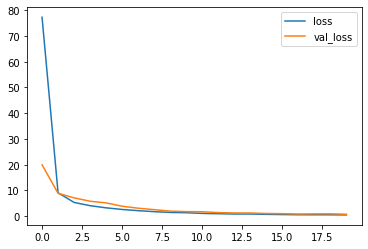

In [64]:
import matplotlib.pyplot as plt 
#4 - Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [65]:
#5 - evaluate
print(model.evaluate(X_valid, y_valid))

20/20 [==============================] - 0s 2ms/step - loss: 312.9296 - accuracy: 0.3770
[312.92962646484375, 0.37697160243988037]


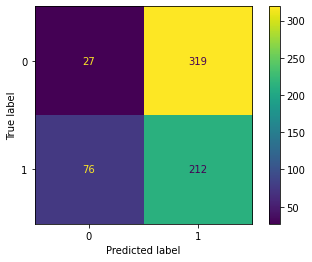






The accuracy is: 0.37697160883280756
The precision is: 0.3992467043314501
The recall is: 0.7361111111111112
The f1 score is: 0.5177045177045178


In [70]:
#6 - Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

p_test = model.predict(X_valid) > 0.5 # if less, benign, and malign vice versa
cm = confusion_matrix(y_valid, p_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#7 - Print details
print('\n\n\n\n')
print(f'The accuracy is: {accuracy_score(y_valid, p_test)}')
print(f'The precision is: {precision_score(y_valid, p_test, zero_division=1)}')
print(f'The recall is: {recall_score(y_valid, p_test)}')
print(f'The f1 score is: {f1_score(y_valid, p_test)}')